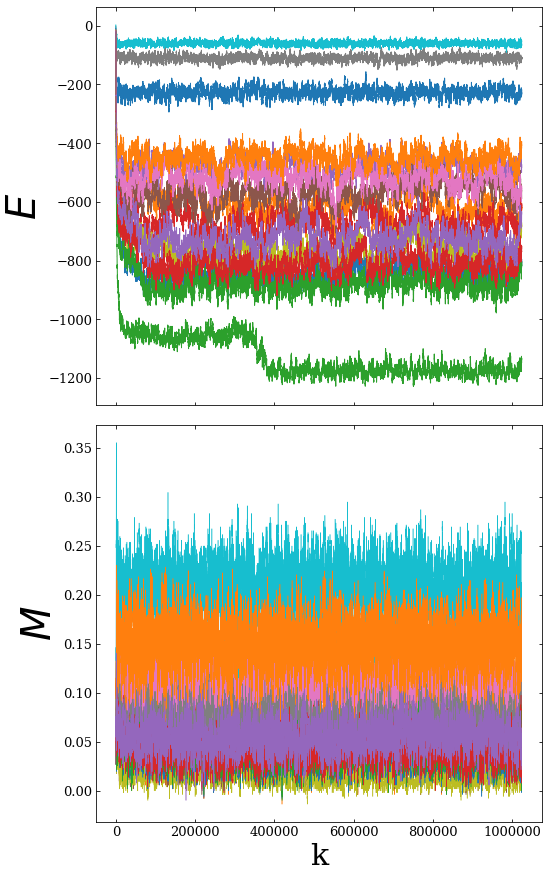

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import ascii
import matplotlib.colors as colors
from matplotlib import *
import sys
from pylab import *
from matplotlib.colors import LogNorm
import scipy.integrate as integrate
import scipy
#import pymc
from astropy.io import fits
import math
import os,glob
import matplotlib.patches as mpatches



mylist11 = []
mylist12 = []


plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'
#mpl.rcParams['font.size'] = 13
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
#mpl.rcParams['axes.labelsize'] = 18

fig = plt.figure(figsize=(8,15)) # Notice the equal aspect ratio


# equivalent but more general
ax1=plt.subplot(2,1, 2)#, gridspec_kw={"width_ratios":1})
ax2=plt.subplot(2,1, 1)#, gridspec_kw={"width_ratios":1}) 


fig.subplots_adjust(wspace=0, hspace=0.05)
#ax1.set_xlim(0.05,1.)
#ax1.set_ylim(2.2,2.6)
#ax2.set_xlim(0.05,1.)
#ax2.set_ylim(0.,0.7)
ax1.tick_params(which="both",direction='in', bottom="on", top="on", left="on", right="on")
ax2.tick_params(which="both",direction='in', bottom="on", top="on", left="on", right="on")
ax2.axes.xaxis.set_ticklabels([])
ax2.set_ylabel(r'$E$',fontsize=40)
ax1.set_ylabel(r'$M$',fontsize=40)
ax1.set_xlabel('k',fontsize=30)


folder_path = '/home/pedro/Escritorio/Fisica-Computacional-master/Metropolis/Data/1d/'
for filename in glob.glob(os.path.join(folder_path,'MMCMag'+'_'+'*.dat')):
    data = pd.read_table(filename, header=None, sep="\s+")
    kmag        =data.iloc[:,0]
    Mag         =data.iloc[:,1]
    x=kmag
    y=Mag
    ax1.plot(x, y, linewidth=0.5,label='_nolegend_')     
            
folder_path = '/home/pedro/Escritorio/Fisica-Computacional-master/Metropolis/Data/1d/'
for filename in glob.glob(os.path.join(folder_path,'MMCEn'+'_'+'*.dat')):
    dataDMO = pd.read_table(filename, header=None, sep="\s+")
    ken        =dataDMO.iloc[:,0]
    En         =dataDMO.iloc[:,1]


    x=ken
    y=En

    ax2.plot(x, y, linewidth=1.,ls='-',label='_nolegend_')
        


plt.savefig('/home/pedro/Escritorio/Fisica-Computacional-master/Metropolis/EryMag1d.pdf', bbox_inches='tight', rasterized=True, dpi=300) ### for publication





368.646268129


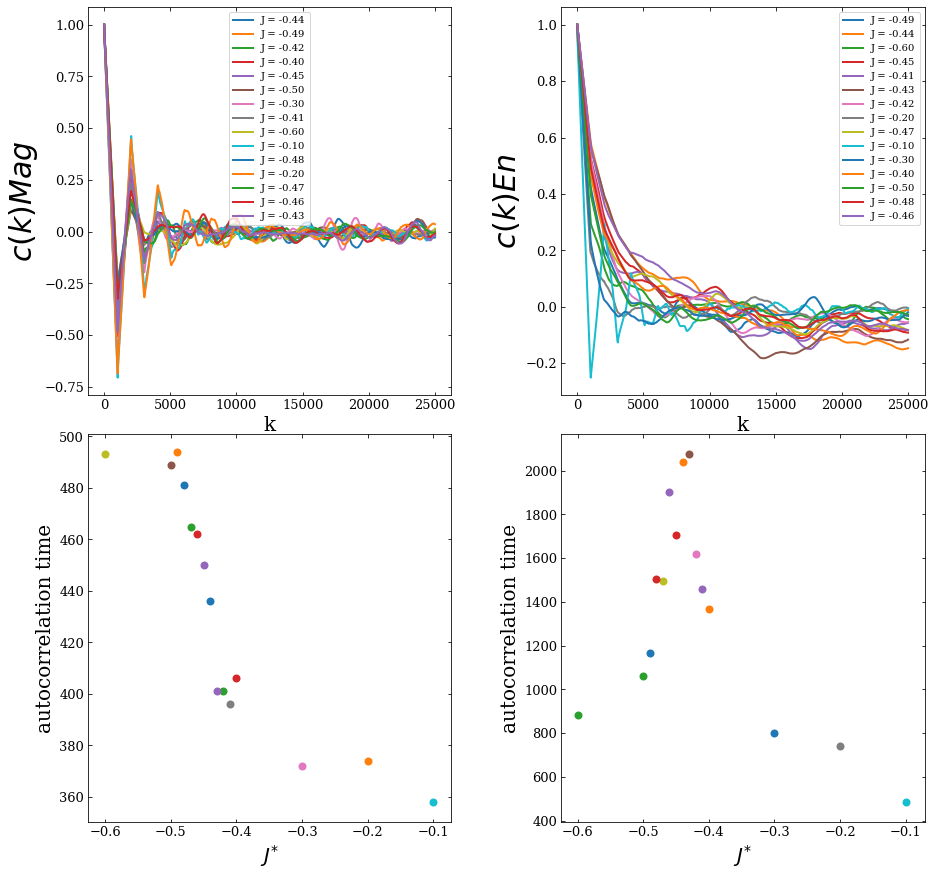

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import ascii
import matplotlib.colors as colors
from matplotlib import *
import sys
from pylab import *
from matplotlib.colors import LogNorm
import scipy.integrate as integrate
import scipy
import pymc
from astropy.io import fits
import math
import os,glob
import matplotlib.patches as mpatches
import time



mylist11 = []
mylist12 = []


plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'
#mpl.rcParams['font.size'] = 13
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
#mpl.rcParams['axes.labelsize'] = 18

fig = plt.figure(figsize=(15,15)) # Notice the equal aspect ratio



# equivalent but more general
ax1=plt.subplot(2,2, 1)#, gridspec_kw={"width_ratios":1})
ax2=plt.subplot(2,2, 2)#, gridspec_kw={"width_ratios":1}) 
ax3=plt.subplot(2,2, 3)#, gridspec_kw={"width_ratios":1})
ax4=plt.subplot(2,2, 4)#, gridspec_kw={"width_ratios":1}) 



fig.subplots_adjust(wspace=0.3, hspace=0.1)
#ax1.set_xlim(0.05,1.)
#ax1.set_ylim(2.2,2.6)
#ax2.set_xlim(0.05,1.)
#ax2.set_ylim(0.,0.7)
ax1.tick_params(which="both",direction='in', bottom="on", top="on", left="on", right="on")
ax2.tick_params(which="both",direction='in', bottom="on", top="on", left="on", right="on")
ax3.tick_params(which="both",direction='in', bottom="on", top="on", left="on", right="on")
ax4.tick_params(which="both",direction='in', bottom="on", top="on", left="on", right="on")
ax2.set_ylabel(r'$c(k)En$',fontsize=30)
ax1.set_ylabel(r'$c(k)Mag$',fontsize=30)
ax1.set_xlabel('k',fontsize=20)
ax2.set_xlabel('k',fontsize=20)
ax3.set_ylabel('autocorrelation time',fontsize=20)
ax4.set_ylabel('autocorrelation time',fontsize=20)
ax3.set_xlabel(r'$J^{*}$',fontsize=20)
ax4.set_xlabel(r'$J^{*}$',fontsize=20)



appended_data = []
appended_dataDMO = []



start = time.time()



dim=16
folder_path = '/home/pedro/Escritorio/Fisica-Computacional-master/Metropolis/Data/1d/'


for filename in glob.glob(os.path.join(folder_path,'MMCMag' +'*.dat')):
    sumacorM= np.zeros(25001)
    filenameMag=filename.split('_')[2]
    J=filenameMag.split('=')[1]
    Jint=float(J)
    for i in range(dim):  
        data = pd.read_table(filename, header=None, sep="\s+")
        data = data[data.iloc[:,0].between(int(20000+50000*i),int(20000+50000*(i+1)), inclusive=True)]        #appended_data.append(data)
        kmag =data.iloc[:,0]
        Mag  =data.iloc[:,1]
        x=kmag
        y=Mag
        index=int(len(kmag)/2)
        yunbiased = y-np.mean(y)
        ynorm = np.sum(yunbiased**2)
        acor = np.correlate(yunbiased, yunbiased, "same")/ynorm
        acorM = acor[index:]
        sumacorM += acorM
        #ax1.plot(acorM, linewidth=0.5,label='_nolegend_')        
        
    sumacorM=sumacorM/dim
    
    cond = np.where(np.absolute(sumacorM-0.37)<0.02)[0]


    ax1.plot(sumacorM, linewidth=2.,label=r'J = %.2f' %(Jint))       
    ax1.legend(fontsize=10.)
    ax3.scatter(Jint,cond[0], linewidth=2.,label=r'J = %.2f' %(Jint))
    
for filename in glob.glob(os.path.join(folder_path,'MMCEn'+'*.dat')):
    sumacorE= np.zeros(25001)
    filenameErg=filename.split('_')[2]
    J=filenameErg.split('=')[1]
    Jint=float(J)
    for i in range(dim): 
        data = pd.read_table(filename, header=None, sep="\s+")
        dataDMO = data[data.iloc[:,0].between(int(20000+50000*i),int(20000+50000*(i+1)), inclusive=True)]
        kEn  =dataDMO.iloc[:,0]
        En  =dataDMO.iloc[:,1]
        x=kEn
        y=En
        index=int(len(kEn)/2)
        yunbiased = y-np.mean(y)
        ynorm = np.sum(yunbiased**2)
        #print (ynorm)
        acor = np.correlate(yunbiased, yunbiased, "same")/ynorm
        acorE = acor[index:]
        sumacorE += acorE
        #ax2.plot(acorE, linewidth=0.5,label='_nolegend_')
        
    sumacorE=sumacorE/dim
    cond = np.where(np.absolute(sumacorE-0.37)<0.02)[0]

    ax2.plot(sumacorE, linewidth=2.,label=r'J = %.2f' %(Jint))
    ax2.legend(fontsize=10.)
    ax4.scatter(Jint,cond[0], linewidth=2.,label=r'J = %.2f' %(Jint))



finish =  time.time()
print (finish -start)


plt.savefig('/home/pedro/Escritorio/Fisica-Computacional-master/Metropolis/Ck1d.pdf', bbox_inches='tight', rasterized=True, dpi=300) ### for publication



